In [7]:
%matplotlib inline
#import sys    
#reload(sys)  
#sys.setdefaultencoding('utf8')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [137]:
def read_weekly_charts(year,start=1,end=53):
    for i in range (start,end+1): 
        URL='https://energy-charts.de/power/week_k_'+str(year)+'_'+str(i).zfill(2)+'.json'
        print URL,
        mo=pd.read_json(URL)
        df_dict={'time':pd.to_datetime(np.array(mo['values'][1])[:,0],unit='ms')}
        for i,d in enumerate(mo['key']):
            #print i,d[0]["de"]
            dict2={d[0]["de"]:np.array(mo['values'][i])[:,1]}
            df_dict.update(dict2)                                        
        df=pd.DataFrame(df_dict)                                                 

        if 'dfres' not in locals():
            dfres=df
        else:
            dfres=pd.concat([dfres, df])
            
    dfres = dfres.set_index(['time'])
    return dfres

In [138]:
dfres=read_weekly_charts(2015,start=1,end=53)

https://energy-charts.de/power/week_k_2015_01.json https://energy-charts.de/power/week_k_2015_02.json https://energy-charts.de/power/week_k_2015_03.json https://energy-charts.de/power/week_k_2015_04.json https://energy-charts.de/power/week_k_2015_05.json https://energy-charts.de/power/week_k_2015_06.json https://energy-charts.de/power/week_k_2015_07.json https://energy-charts.de/power/week_k_2015_08.json https://energy-charts.de/power/week_k_2015_09.json https://energy-charts.de/power/week_k_2015_10.json https://energy-charts.de/power/week_k_2015_11.json https://energy-charts.de/power/week_k_2015_12.json https://energy-charts.de/power/week_k_2015_13.json https://energy-charts.de/power/week_k_2015_14.json https://energy-charts.de/power/week_k_2015_15.json https://energy-charts.de/power/week_k_2015_16.json https://energy-charts.de/power/week_k_2015_17.json https://energy-charts.de/power/week_k_2015_18.json https://energy-charts.de/power/week_k_2015_19.json https://energy-charts.de/power/

In [71]:
def plot_energy(df):
    df.plot(stacked=False,kind='area',figsize=(15,5));
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
    
def plot_price(df):
    df.plot(figsize=(15,5));
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

In [181]:
dfres=dfres[dfres.index.year==2015]
dfres.columns = dfres.columns.str.replace(' > 100 MW','')
dfres.columns = dfres.columns.str.replace(' Saldo','')
dfres['Last']=dfres.Solar+dfres.Wind+dfres.Konventionell+dfres.Import

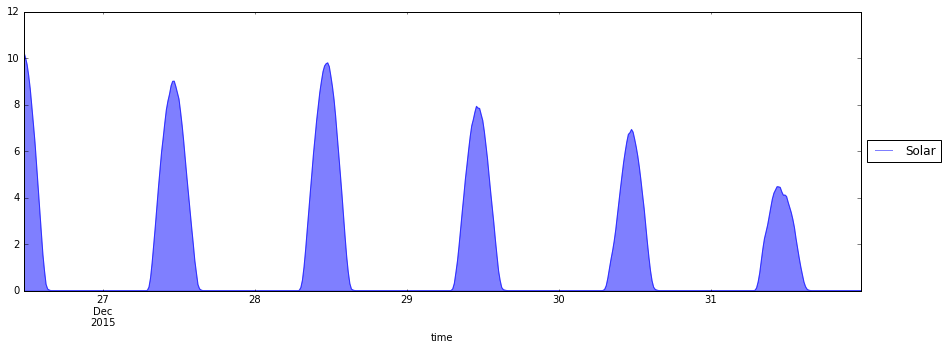

In [257]:
plot_energy(dfres.Solar[-530:])

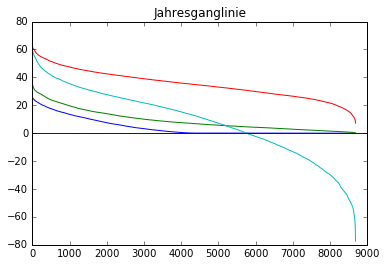

In [263]:
plt.plot(-np.sort(-dfres.Solar[::4]))
plt.plot(-np.sort(-dfres.Wind[::4]))
plt.plot(-np.sort(-(dfres.Last[::4]-1*dfres.Solar[::4]-1*dfres.Wind[::4])),label='Restleistung')

Rest_zukunft=dfres.Last[::4]-3*dfres.Solar[::4]-3*dfres.Wind[::4]
plt.plot(-np.sort(-Rest_zukunft),label='Restleistung bei 3fachem Wind und Solarzubau')

plt.axhline(0)
plt.title('Jahresganglinie');

In [266]:
dfres.Last.sum(),Rest_zukunft.sum(),-Rest_zukunft[Rest_zukunft<0].sum()

(1685660.2890000045, 74801.5649999998, 57238.904999999984)

In [187]:
dfres.head()

,Import,Konventionell,Solar,Wind,Date,Clock,Last
time,,,,,,,
2015-01-01 00:00:00,-7.246,35.393,0,9.195,2015-01-01,00:00:00,37.342
2015-01-01 01:00:00,-7.307,34.312,0,9.252,2015-01-01,01:00:00,36.257
2015-01-01 02:00:00,-7.246,33.658,0,9.318,2015-01-01,02:00:00,35.730
2015-01-01 03:00:00,-7.488,33.653,0,9.348,2015-01-01,03:00:00,35.513
2015-01-01 04:00:00,-6.869,32.581,0,9.509,2015-01-01,04:00:00,35.221


In [201]:
dfres.tail()

,Import,Konventionell,Solar,Wind,Date,Clock,Last
time,,,,,,,
2015-12-31 22:45:00,-2.301,36.516,0,9.714,2015-12-31,22:45:00,43.929
2015-12-31 23:00:00,-6.982,33.963,0,8.879,2015-12-31,23:00:00,35.860
2015-12-31 23:15:00,-6.845,34.065,0,8.687,2015-12-31,23:15:00,35.907
2015-12-31 23:30:00,-6.862,34.166,0,8.554,2015-12-31,23:30:00,35.858
2015-12-31 23:45:00,-6.903,34.267,0,8.471,2015-12-31,23:45:00,35.835


In [316]:
def yeardayplot(dfres,art):
    data3=dfres.reset_index()
    data3=data3.set_index(['Date', 'Clock'])
    d=data3.unstack()
    f=np.array(d[art].values)
    fig=figure(figsize=(16,6))
    plt.imshow(f,aspect=.2)
    plt.xticks(range(0,len(d[art].columns),12),d[art].columns[::12],rotation=90);
    plt.yticks(range(0,len(d[art].index.date),10),d[art].index[::10].date);
    plt.ylabel('days')
    plt.xlabel('1/4*hours')
    plt.title(art)
    colorbar();
    return f

In [203]:
dfres['Date'] = dfres.index.date
dfres['Clock'] = dfres.index.time

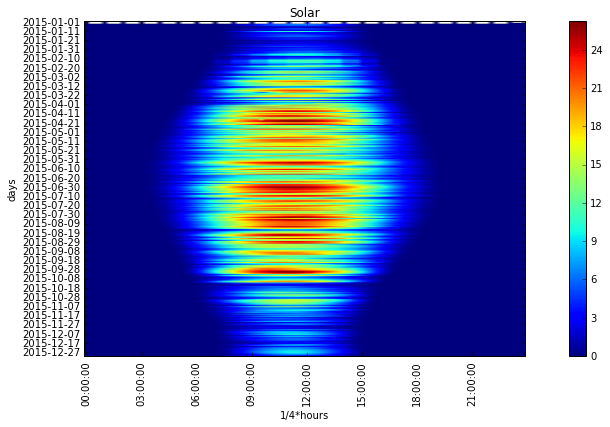

In [320]:
yeardayplot(dfres,'Solar');

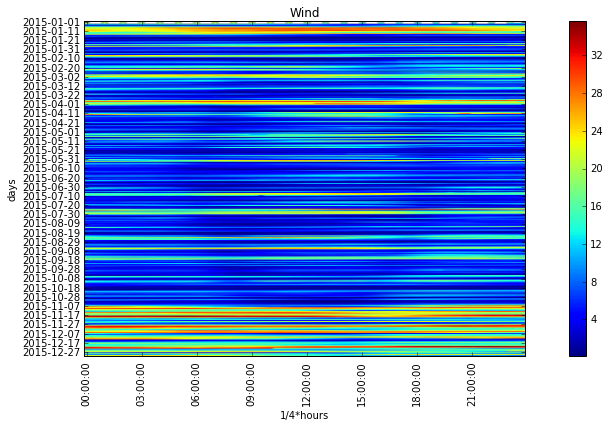

In [321]:
yeardayplot(dfres,'Wind');

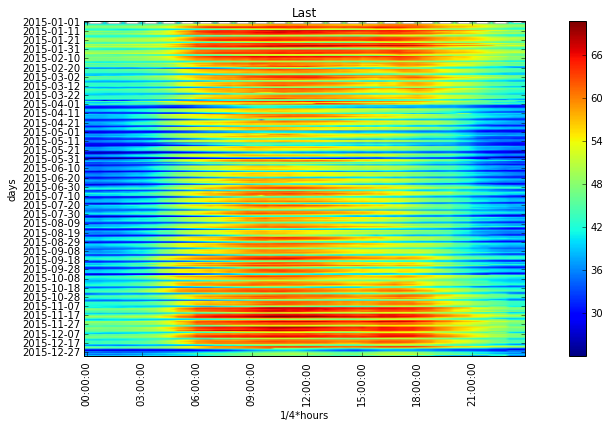

In [324]:
yeardayplot(dfres,'Last');

In [337]:
RestFuture=dfres.Last-3*dfres.Solar-3*dfres.Wind

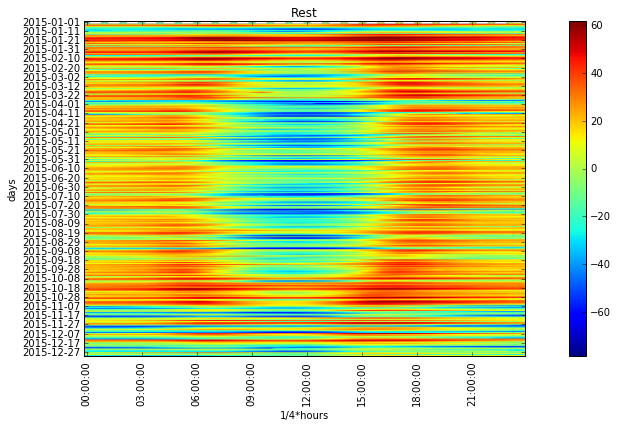

In [345]:
RestFut=pd.DataFrame(RestFuture,columns=['Rest'])
RestFut
RestFut['Date'] = RestFut.index.date
RestFut['Clock'] = RestFut.index.time
RestFut=RestFut.reset_index()
RestFut=RestFut.set_index(['Date', 'Clock'])
yeardayplot(RestFut,'Rest');

In [286]:
Rest_zukunft.diff().argmax(),Rest_zukunft.diff().argmin()

(Timestamp('2015-01-04 16:00:00'), Timestamp('2015-04-12 20:15:00'))

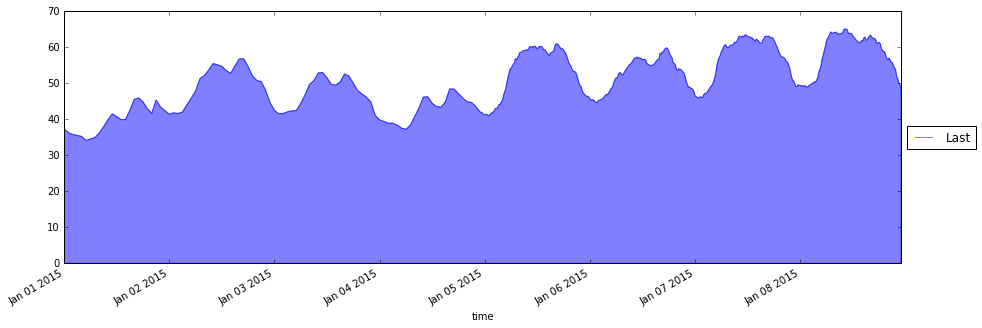

In [346]:
plot_energy(dfres.Last[0:480])

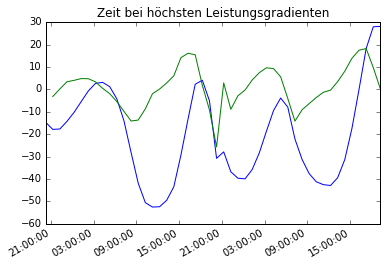

In [350]:
Rest_zukunft[pd.date_range(Rest_zukunft.diff().argmin()-relativedelta(days=1), periods=48, freq='H')].plot();
Rest_zukunft[pd.date_range(Rest_zukunft.diff().argmin()-relativedelta(days=1), periods=48, freq='H')].diff().plot(style="g")
plt.title(u'Zeit bei höchsten Leistungsgradienten');

In [180]:
mo_wind_df=pd.DataFrame({'time':pd.to_datetime(mo_wind[:,0],unit='ms'),'power':mo_wind[:,1]})
mo_wind_df = mo_wind_df.set_index(['time'])

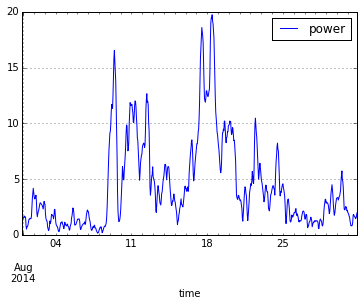

In [181]:
mo_wind_df.plot()

In [182]:
dic=dict({'df':342})
dic2={'df2':45}

In [183]:
dic.update(dic2)

In [105]:
pr=pd.read_json('https://energy-charts.de/price/month_2015_03.json')

In [198]:
df=read_charts('https://energy-charts.de/price/month_2015_03.json')


Import Saldo 0
Konventionell > 100 MW 1
Wind 2
Solar 3
Last 4
Day Ahead Auktion 5
Intraday kontinuierlich, Durchschnittspreis 6
Intraday kontinuierlich, Niedrigstpreis 7
Intraday kontinuierlich, Höchstpreis 8


In [235]:
def read_charts2(URL):
    mo=pd.read_json(URL)
    df_dict={'time':pd.to_datetime(np.array(mo['values'][1])[:,0],unit='ms')}
    df_dict_pr={'time':pd.to_datetime(np.array(mo['values'][1])[:,0],unit='ms')}
    
    for i,d in enumerate(mo['key']):
        print d[0]["de"],i
        if (i<4) and (i>0):
            dict2={d[0]["de"]:np.array(mo['values'][i])[:,1]}
            df_dict.update(dict2)                                        
        else:
            dict2_pr={d[0]["de"]:np.array(mo['values'][i])[:,1]}
            df_dict_pr.update(dict2_pr)
    en=pd.DataFrame(df_dict)                                                 
    en = en.set_index(['time'])
    pr=pd.DataFrame(df_dict_pr)                                                 
    pr = pr.set_index(['time'])                                                       
    return en,pr

In [256]:
en,pr=read_charts2('https://energy-charts.de/price/month_2015_06.json')

Import Saldo 0
Konventionell > 100 MW 1
Wind 2
Solar 3
Last 4
Day Ahead Auktion 5
Intraday kontinuierlich, Durchschnittspreis 6
Intraday kontinuierlich, Niedrigstpreis 7
Intraday kontinuierlich, Höchstpreis 8


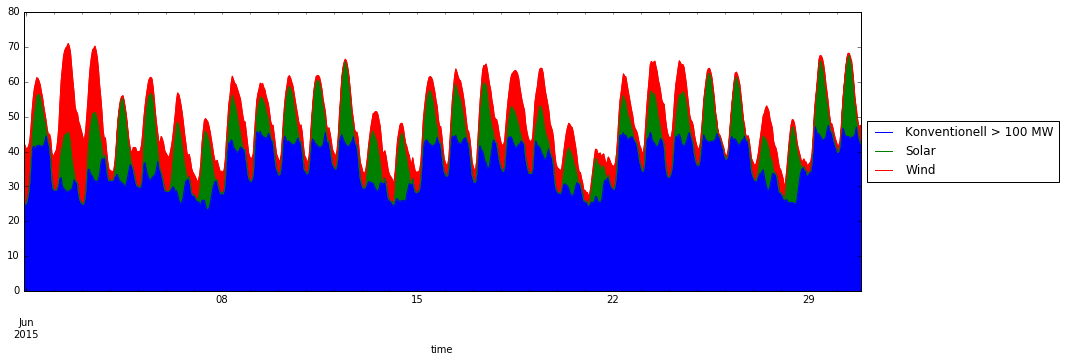

In [257]:
plot_energy(en)

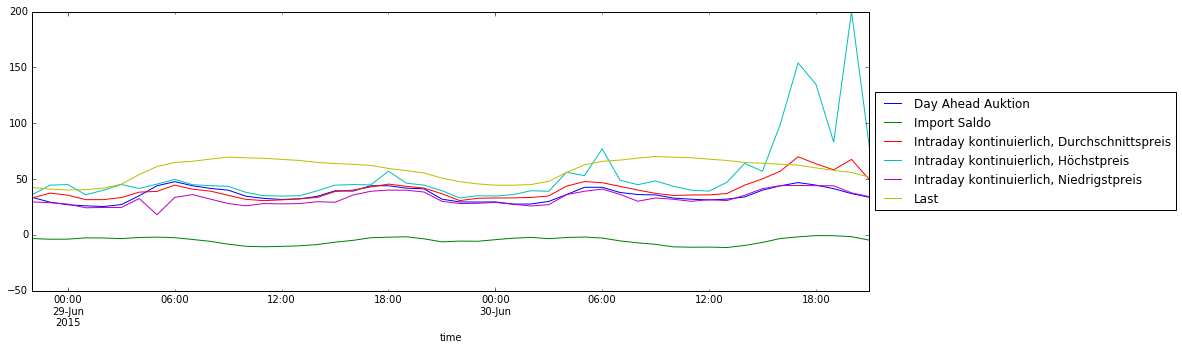

In [265]:
plot_price(pr[-48:]);

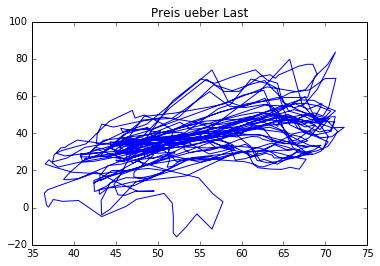

In [246]:
plt.plot(pr.Last,pr[pr.columns[2]])
plt.title('Preis ueber Last')

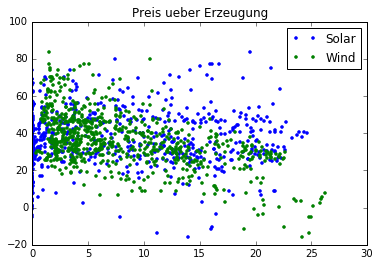

In [247]:
plt.plot(en.Solar,pr[pr.columns[2]],'.',label='Solar')
plt.plot(en.Wind,pr[pr.columns[2]],'.',label='Wind')
plt.legend()
plt.title('Preis ueber Erzeugung');

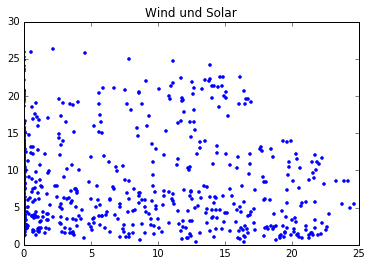

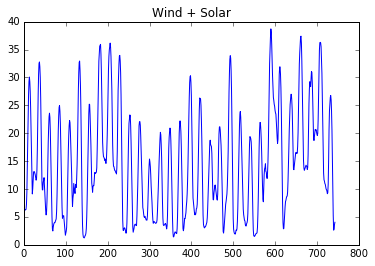

In [251]:
plt.plot(en.Solar,en.Wind,'.')
plt.title('Wind und Solar');
plt.show()
plt.plot(en.Solar.values+en.Wind.values)
plt.title('Wind + Solar');

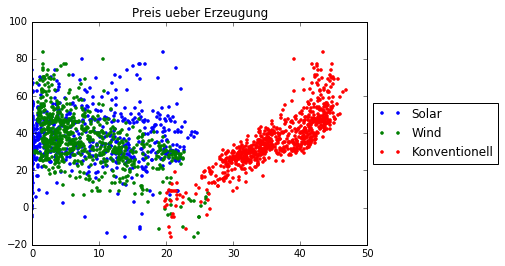

In [252]:
plt.plot(en.Solar,pr[pr.columns[2]],'.',label='Solar')
plt.plot(en.Wind,pr[pr.columns[2]],'.',label='Wind')
plt.plot(en['Konventionell > 100 MW'],pr[pr.columns[2]],'.',label='Konventionell')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Preis ueber Erzeugung');
plt.show()

In [217]:
en.columns

Index([u'Konventionell > 100 MW', u'Solar', u'Wind'], dtype='object')